In [40]:
import numpy as np
import pandas as pd

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import gc

In [42]:
sanren_odds = pd.read_csv("/Users/k17099kk/bigdata/keiba_data/odds_sanrenpuku.csv")
umatan_odds = pd.read_csv("/Users/k17099kk/bigdata/keiba_data/odds_uma_tan.csv")
sanren_harai = pd.read_csv("/Users/k17099kk/bigdata/keiba_data/harai_sanrenpuku.csv")
#umatan_harai = pd.read_csv("/Users/k17099kk/bigdata/keiba_data/harai_umatan.csv")

In [43]:
gc.collect()

11926

In [44]:
sanren_odds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Columns: 816 entries, rank_1_sanrenpuku to rank_816_sanrenpuku
dtypes: float64(812), int64(4)
memory usage: 99.1 MB


In [45]:
umatan_odds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Columns: 306 entries, rank_1_umatan to rank_306_umatan
dtypes: float64(305), int64(1)
memory usage: 37.2 MB


In [46]:
odds = pd.concat([sanren_odds, umatan_odds], axis=1)

In [47]:
data = pd.concat([sanren_harai, odds], axis=1)

In [48]:
data

,target_harai,target_rank,rank_1_sanrenpuku,rank_2_sanrenpuku,rank_3_sanrenpuku,rank_4_sanrenpuku,rank_5_sanrenpuku,rank_6_sanrenpuku,rank_7_sanrenpuku,rank_8_sanrenpuku,...,rank_297_umatan,rank_298_umatan,rank_299_umatan,rank_300_umatan,rank_301_umatan,rank_302_umatan,rank_303_umatan,rank_304_umatan,rank_305_umatan,rank_306_umatan
0,7070,22,145,148,185.0,205,222.0,252.0,258.0,259.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1600,4,105,115,120.0,160,191.0,198.0,244.0,274.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4160,11,97,127,131.0,139,142.0,215.0,239.0,364.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3050,9,117,120,121.0,143,211.0,286.0,295.0,300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11910,37,97,131,142.0,188,216.0,224.0,237.0,327.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1080,2,94,108,118.0,225,250.0,276.0,310.0,326.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5940,21,164,226,234.0,246,294.0,317.0,330.0,335.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,6140,14,166,179,198.0,229,248.0,264.0,286.0,291.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,68980,162,170,179,195.0,276,335.0,340.0,340.0,361.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1050,3,60,60,105.0,130,144.0,195.0,207.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
data['manba_flag'] = data['target_harai'].apply(lambda x : 1 if x >= 10000 else 0)

In [50]:
X = data.drop(['target_harai', 'target_rank', 'manba_flag'],axis=1)
y = data['manba_flag']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,)

In [52]:
train = pd.concat([y_train, X_train], axis=1)

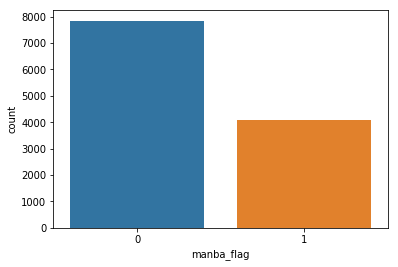

In [53]:
sns.countplot(y_train)

In [54]:
X_train.columns

Index(['rank_1_sanrenpuku', 'rank_2_sanrenpuku', 'rank_3_sanrenpuku',
       'rank_4_sanrenpuku', 'rank_5_sanrenpuku', 'rank_6_sanrenpuku',
       'rank_7_sanrenpuku', 'rank_8_sanrenpuku', 'rank_9_sanrenpuku',
       'rank_10_sanrenpuku',
       ...
       'rank_297_umatan', 'rank_298_umatan', 'rank_299_umatan',
       'rank_300_umatan', 'rank_301_umatan', 'rank_302_umatan',
       'rank_303_umatan', 'rank_304_umatan', 'rank_305_umatan',
       'rank_306_umatan'],
      dtype='object', length=1122)

In [55]:
X_train.describe()

,rank_1_sanrenpuku,rank_2_sanrenpuku,rank_3_sanrenpuku,rank_4_sanrenpuku,rank_5_sanrenpuku,rank_6_sanrenpuku,rank_7_sanrenpuku,rank_8_sanrenpuku,rank_9_sanrenpuku,rank_10_sanrenpuku,...,rank_297_umatan,rank_298_umatan,rank_299_umatan,rank_300_umatan,rank_301_umatan,rank_302_umatan,rank_303_umatan,rank_304_umatan,rank_305_umatan,rank_306_umatan
count,11944.000000,11944.000000,11943.000000,11944.000000,11942.000000,11942.000000,11942.000000,11937.000000,11944.000000,11942.000000,...,530.000000,520.000000,570.000000,552.000000,575.000000,574.000000,575.000000,649.000000,632.000000,696.000000
mean,120.094859,156.959478,182.652097,213.883456,242.494306,269.813432,297.318958,324.268996,349.920881,376.122090,...,130826.688679,136464.190385,149868.210526,161666.293478,167352.415652,174816.872822,200608.831304,231218.687211,266465.931962,308110.153736
std,62.340540,69.066965,73.033329,76.074345,79.534178,81.366446,83.114261,84.442451,85.852475,87.292153,...,93251.727647,92998.484369,108836.437631,123922.642598,124522.523022,135219.859062,161149.290184,192448.152694,220180.703163,255370.534088
min,11.000000,24.000000,35.000000,54.000000,74.000000,81.000000,123.000000,125.000000,147.000000,158.000000,...,26945.000000,22207.000000,22513.000000,23583.000000,25941.000000,28183.000000,29118.000000,0.000000,31879.000000,0.000000
25%,76.000000,108.000000,131.000000,160.000000,187.000000,212.000000,239.000000,266.000000,291.000000,316.000000,...,70487.000000,75683.750000,78945.750000,79135.250000,85267.500000,88847.000000,97753.000000,106700.000000,117964.750000,131966.250000
50%,109.000000,146.000000,170.000000,201.000000,228.000000,256.000000,285.000000,311.000000,338.000000,364.000000,...,106588.000000,112832.000000,117928.500000,124130.500000,129039.000000,135103.000000,150863.000000,164890.000000,189210.500000,213264.500000
75%,152.000000,193.000000,221.000000,253.000000,285.000000,312.000000,340.000000,368.000000,396.000000,422.000000,...,157460.000000,170497.250000,189284.000000,202450.750000,210607.500000,211683.000000,235677.500000,288847.000000,332049.250000,380774.750000
max,550.000000,603.000000,646.000000,709.000000,720.000000,766.000000,782.000000,850.000000,868.000000,907.000000,...,630886.000000,708592.000000,903075.000000,992395.000000,920403.000000,999999.000000,999999.000000,999999.000000,999999.000000,999999.000000


In [56]:
X_train.isnull().sum()

rank_1_sanrenpuku         0
rank_2_sanrenpuku         0
rank_3_sanrenpuku         1
rank_4_sanrenpuku         0
rank_5_sanrenpuku         2
rank_6_sanrenpuku         2
rank_7_sanrenpuku         2
rank_8_sanrenpuku         7
rank_9_sanrenpuku         0
rank_10_sanrenpuku        2
rank_11_sanrenpuku       14
rank_12_sanrenpuku       16
rank_13_sanrenpuku       15
rank_14_sanrenpuku       19
rank_15_sanrenpuku       17
rank_16_sanrenpuku       21
rank_17_sanrenpuku       13
rank_18_sanrenpuku       26
rank_19_sanrenpuku       17
rank_20_sanrenpuku       23
rank_21_sanrenpuku       60
rank_22_sanrenpuku       62
rank_23_sanrenpuku       59
rank_24_sanrenpuku       55
rank_25_sanrenpuku       62
rank_26_sanrenpuku       60
rank_27_sanrenpuku       65
rank_28_sanrenpuku       64
rank_29_sanrenpuku       57
rank_30_sanrenpuku       72
                      ...  
rank_277_umatan       11439
rank_278_umatan       11434
rank_279_umatan       11403
rank_280_umatan       11456
rank_281_umatan     

In [57]:
train = pd.concat([y_train, X_train], axis=1)
train

,manba_flag,rank_1_sanrenpuku,rank_2_sanrenpuku,rank_3_sanrenpuku,rank_4_sanrenpuku,rank_5_sanrenpuku,rank_6_sanrenpuku,rank_7_sanrenpuku,rank_8_sanrenpuku,rank_9_sanrenpuku,...,rank_297_umatan,rank_298_umatan,rank_299_umatan,rank_300_umatan,rank_301_umatan,rank_302_umatan,rank_303_umatan,rank_304_umatan,rank_305_umatan,rank_306_umatan
13882,0,53,74,79.0,128,339.0,348.0,376.0,376.0,400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2727,0,173,228,278.0,320,331.0,334.0,344.0,345.0,378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3964,0,86,89,125.0,128,165.0,195.0,199.0,213.0,213,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6896,0,103,129,134.0,144,145.0,173.0,237.0,239.0,265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10783,1,81,129,149.0,162,180.0,185.0,217.0,288.0,301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12648,1,153,159,204.0,263,318.0,354.0,393.0,393.0,416,...,200237.0,225267.0,NaN,257448.0,300356.0,NaN,360427.0,NaN,NaN,600712.0
3836,0,90,98,117.0,158,198.0,204.0,233.0,278.0,286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,1,68,91,98.0,154,167.0,217.0,231.0,232.0,246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8423,1,128,142,172.0,200,256.0,270.0,295.0,301.0,347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8140,1,164,173,214.0,275,285.0,376.0,440.0,443.0,447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.4,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.05,
    'learning_rate': 0.01,
    'max_depth': -1,  
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': 1
}

In [73]:
train = pd.concat([y_train, X_train], axis=1)
train_df = train
test_df = X_test
target = y_train
features = [c for c in train.columns if c not in ['manba_flag']]

In [74]:
folds = StratifiedKFold(n_splits=10, shuffle=False, random_state=44000)
oof = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_df.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(train_df.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(train_df.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 100000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=300, early_stopping_rounds = 1000)
    oof[val_idx] = clf.predict(train_df.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(test_df[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 1000 rounds.
[300]	training's auc: 0.752669	valid_1's auc: 0.687046
[600]	training's auc: 0.788661	valid_1's auc: 0.686752
[900]	training's auc: 0.821312	valid_1's auc: 0.689006
[1200]	training's auc: 0.846441	valid_1's auc: 0.688762
[1500]	training's auc: 0.870733	valid_1's auc: 0.6899
[1800]	training's auc: 0.889052	valid_1's auc: 0.690521
[2100]	training's auc: 0.90589	valid_1's auc: 0.688378
[2400]	training's auc: 0.919447	valid_1's auc: 0.686159
[2700]	training's auc: 0.931334	valid_1's auc: 0.686131
Early stopping, best iteration is:
[1801]	training's auc: 0.889097	valid_1's auc: 0.690584
Fold 1
Training until validation scores don't improve for 1000 rounds.
[300]	training's auc: 0.752836	valid_1's auc: 0.671449
[600]	training's auc: 0.788037	valid_1's auc: 0.671686
[900]	training's auc: 0.820238	valid_1's auc: 0.668853
Early stopping, best iteration is:
[56]	training's auc: 0.725789	valid_1's auc: 0.67767
Fold 2
Training 

/Users/k17099kk/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


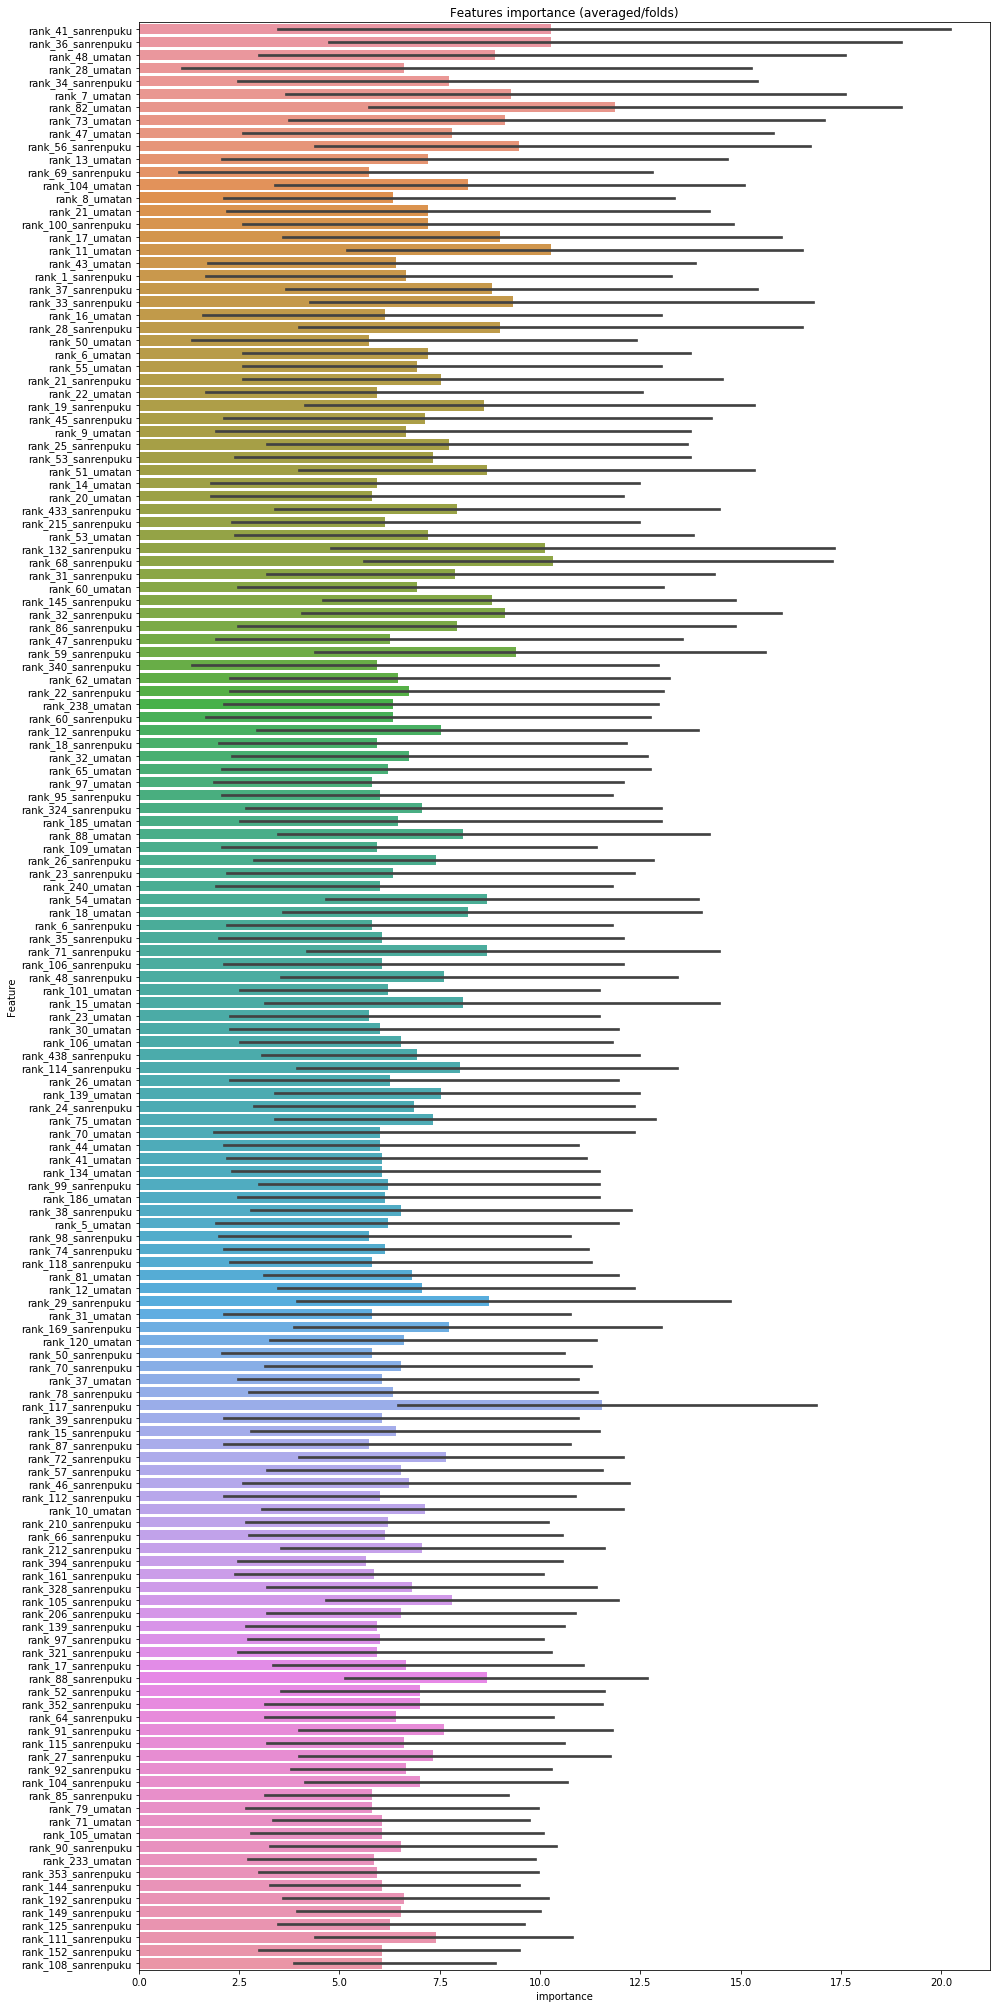

In [75]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
plt.savefig('FI.png')

In [87]:
#c = train_df.columns[301:817]
#train_df.drop(c, axis=1, inplace=True)
#test_df.drop(c, axis=1, inplace=True)

/Users/k17099kk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [99]:
import pandas_profiling as pdp

In [100]:
# レポーティング
report = pdp.ProfileReport(train)
report # jupyter notebookuで実行すると、notebook上に表示される。
# ファイル出力
report.to_file("odds_pre.html")

KeyboardInterrupt: 